**This notebook was created to handle the data, right from data cleaning, EDA, data preprocessing till model building and model validation. Thereafter, the required steps were carried out in different modules broken down for readability. Lastly, storing the model and pipelines in .pkl files, to be used in the app.**

In [ ]:
 #Data manipulation and handling libraries
import numpy as np
import pandas as pd


#Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci

In [ ]:
#Warning suppression
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/datasets/Tourist_Dataset.xlsx")

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
for col in df.columns:
  num_unique_values = len(df[col].unique())
  value_counts = df[col].value_counts()
  print(f"Column: {col} has {num_unique_values} unique values\n")
  print(value_counts)
  print("-------------------------------\n\n\n")

Column: CustomerID has 4888 unique values

200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: CustomerID, Length: 4888, dtype: int64
-------------------------------



Column: ProdTaken has 2 unique values

0    3968
1     920
Name: ProdTaken, dtype: int64
-------------------------------



Column: Age has 45 unique values

35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
-------------------------------





**Data Dictionary**

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5
planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer
* Customer interaction data:
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

Observations here:
* ProdTaken is our dependent variable and needs to be converted to categorical variable
* There are some null values
* 4888 entries 20 columns
* More insights on data are required

### **Defining Target Feature**

In [ ]:
Y = df["ProdTaken"]
X = df.drop("ProdTaken", axis = 1)

### **Data Preprocessing**

In [ ]:
# Firstly checking for duplicated data
df.duplicated().sum()

0

Since there are no duplicates we can move ahead to segregate the data between
numerical and categorical and working on data cleaning

### **Segregating numerical and categorical**

In [ ]:
df_num = df.select_dtypes(['int64', 'float64'])
df_num.head().transpose()
# Here we've sliced the data
# however using .loc is a better option

,0,1,2,3,4
CustomerID,200000.0,200001.0,200002.0,200003.0,200004.0
ProdTaken,1.0,0.0,1.0,0.0,0.0
Age,41.0,49.0,37.0,33.0,NaN
CityTier,3.0,1.0,1.0,1.0,1.0
DurationOfPitch,6.0,14.0,8.0,9.0,8.0
NumberOfPersonVisited,3.0,3.0,3.0,2.0,2.0
NumberOfFollowups,3.0,4.0,4.0,3.0,3.0
PreferredPropertyStar,3.0,4.0,3.0,3.0,4.0
NumberOfTrips,1.0,2.0,7.0,2.0,1.0
Passport,1.0,0.0,1.0,1.0,0.0


In [ ]:
#ProdTaken, CityTier, NumberOfPersonVisited, NumberOfFollowups, PreferredPropertyStar,
# NumberOfTrips, Passport, PitchSatisfactionScore, OwnCar, NumberOfChildrenVisited

# Only Age and monthly income are in really the numerical features
# So we will change their data types


convert_typelist = ['ProdTaken', 'CityTier', 'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar',
            'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited']

for col in convert_typelist:
  df[col] = df[col].astype('object')


df_cat = df.select_dtypes(['object'])
df_cat.head()

,ProdTaken,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation
0,1,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager
1,0,Company Invited,1,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager
2,1,Self Enquiry,1,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive
3,0,Company Invited,1,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive
4,0,Self Enquiry,1,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive


In [ ]:
cols = df.select_dtypes(["object"])

for i in cols.columns:
    df[i] = df[i].astype("category")
    df_cat[i] = df_cat[i].astype("category")

In [ ]:
df_num = df.select_dtypes(['int64', 'float64'])
df_num.head()

,CustomerID,Age,DurationOfPitch,MonthlyIncome
0,200000,41.0,6.0,20993.0
1,200001,49.0,14.0,20130.0
2,200002,37.0,8.0,17090.0
3,200003,33.0,9.0,17909.0
4,200004,NaN,8.0,18468.0


## **Treating the missing values first**

In [ ]:
df_num.isnull().sum()

CustomerID           0
Age                226
DurationOfPitch    251
MonthlyIncome      233
dtype: int64

In [ ]:
df_cat.isnull().sum()

ProdTaken                    0
TypeofContact               25
CityTier                     0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
dtype: int64

Age and Monthly income are related to Designation. And Designation does not have missing values. So we can use that column to fill in these values.

Duration of pitch can be populated by the median values.

NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisited, can be populated by the median values   

TypeofContact

In [ ]:
# filling the median value

for col in df_num.columns:
  df[col] = df_num[col].fillna(df[col].median())

In [ ]:
# filling up mode in the categorical columns
for col in df_cat.columns:
  df[col] = df_cat[col].fillna(df[col].value_counts().index[0])

In [ ]:
df_cat.head()

,ProdTaken,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation
0,1,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager
1,0,Company Invited,1,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager
2,1,Self Enquiry,1,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive
3,0,Company Invited,1,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive
4,0,Self Enquiry,1,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive


In [ ]:
df.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [ ]:
df_num = df.select_dtypes(['int64', 'float64'])

### **Looking through Categorical columns**

In [ ]:
#get the valuecounts
for i in df_cat.columns:
    print(df_cat[i].value_counts())
    print("-"*50)
    print("\n")

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64
--------------------------------------------------


4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1

### **Cleaning the strings**

* In the Gender column we have a third category as "Fe Male". Which we'll treat as a data entry issue.
* Married people take the most trips
* Self Enquiry is the most preffered in TypeofContact feature.
* 3.0 is the highest property preferred
* Majority people prefer their own car
* The basic package is the highest sold

In [ ]:
# Cleaning the Gender col string
# treating error
df_cat.Gender = df.Gender.replace("Fe Male","Female")

# verify the update
df_cat.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Number of trips has too many categories and we shall treat it as numerical feature

Along with Duration of Pitch

## **Descriptive Analysis**

### **Functions**

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

  f2, (ax_box2, ax_hist2) = plt.subplots( nrows=2,  # Number of rows of the subplot grid= 2
                                          sharex=True,  # x-axis will be shared among all subplots
                                          gridspec_kw={"height_ratios": (0.25, 0.75)},
                                          figsize=figsize)  # creating the 2 subplots
  quantiles = np.array([df[feature].quantile(0.00),
                          df[feature].quantile(0.25),
                          df[feature].quantile(0.50),
                          df[feature].quantile(0.75),
                          df[feature].quantile(1.00)])

  sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")
    # boxplot will be created and a marker will indicate the mean value of the column
    # with showmenas = True
  ax_box2.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
  ax_box2.set_xticks(quantiles)
  ax_box2.set_xlabel('value')


  if bins:
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter")
  else:
    sns.histplot( data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

  ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Green line shows mean
  ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")  # blue line shows median
  plt.show()  # show the plot

In [ ]:
# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    # Barplot with percentage at the top

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    # if v_ticks is True:
    #     plt.xticks(rotation=90)

    ax = sns.countplot(data=data,
                       x=feature,
                       palette="muted",
                       order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:          #Every Bar in the chart is called a patch
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
            # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points")  # annotate the percentage
    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)

    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    plt.show()

In [ ]:
def perc_stacked_barplot(df, x_var, y_var):
    count = df[x_var].nunique()
    sorter = df[y_var].value_counts().index[-1]
    tab1 = pd.crosstab(df[x_var], df[y_var], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[x_var], df[y_var], normalize="index").sort_values(by=sorter, ascending=False)

    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
    df_grouped.plot.bar(stacked=True)
    plt.legend(bbox_to_anchor=(0.5, 1.02),
               loc="lower center",
               borderaxespad=0,
               frameon=False,
               ncol=3)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(ix,
                         cumulative + element / 2,
                         f"{int(element * 100)} %",
                         va="center",
                         ha="center")
            cumulative += element
    plt.tight_layout()

### **Target Variable - Product Taken**

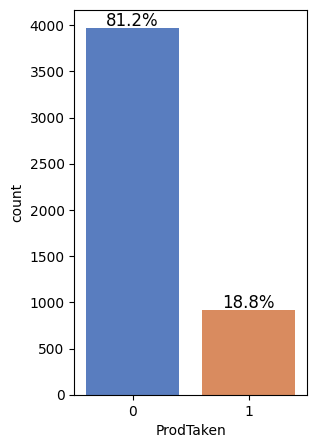

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df_cat,"ProdTaken", True, False)

* Only 18.8% of the customers actually buy the product
* There is a high imbalance in class

### **Summary of numerical columns**

In [ ]:
df_num = df.select_dtypes(["int64", "float64"])
df_num.describe()

,CustomerID,Age,DurationOfPitch,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,37.547259,15.362930,23559.179419
std,1411.188388,9.104795,8.316166,5257.862921
min,200000.000000,18.000000,5.000000,1000.000000
25%,201221.750000,31.000000,9.000000,20485.000000
50%,202443.500000,36.000000,13.000000,22347.000000
75%,203665.250000,43.000000,19.000000,25424.750000
max,204887.000000,61.000000,127.000000,98678.000000


In [ ]:
""" Customer ID """
# dropping the customer id here since we would not need it for prediction purposes
df_num = df_num.drop('CustomerID', axis = 1)
df = df.drop('CustomerID', axis = 1)

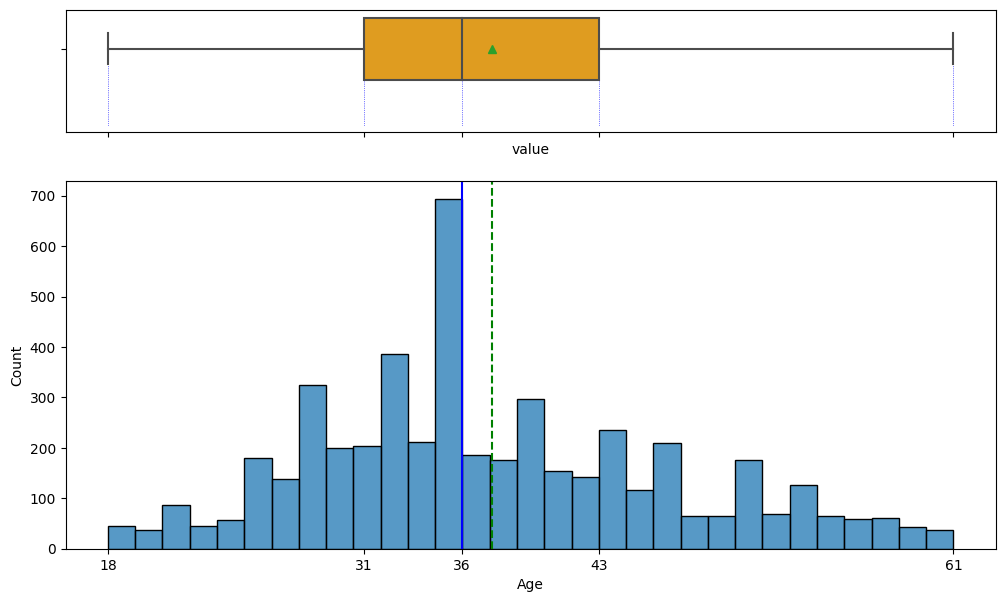

In [ ]:
""" Age """
# looking at the distribution first
histogram_boxplot(df_num, "Age")

In [ ]:
# Checking skewness
df_num["Age"].skew()

0.41579605786474494

In [ ]:
Q1 = df_num["Age"].quantile(0.25)
Q3 = df_num["Age"].quantile(0.75)
print("Middle 50 % data falls in ", Q1, "and", Q3)

Middle 50 % data falls in  31.0 and 43.0


* Age does follow a mostly normal distribution and is slightly positively skewed.
* There are no outliers
* Most customers are in the age bracket between 31 and 43

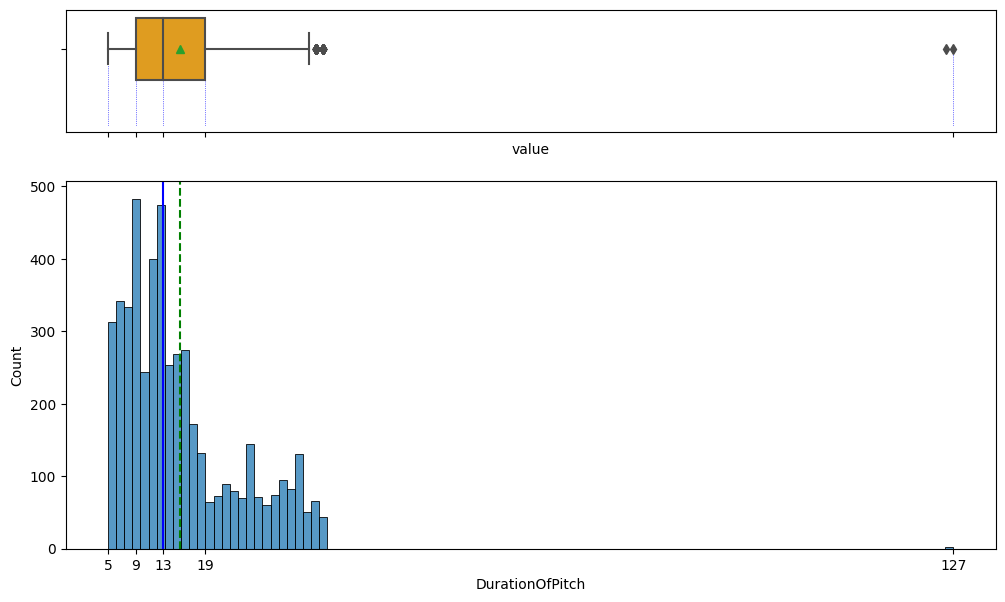

In [ ]:
""" Duration of Pitch """
# looking at the distribution first
histogram_boxplot(df_num, "DurationOfPitch")

* There are some outlliers present that is affecting the mean n median values.
* Most of the customers had the pitch under 20 mins but some are seen taking upto 40 mins and some even upto 120mins

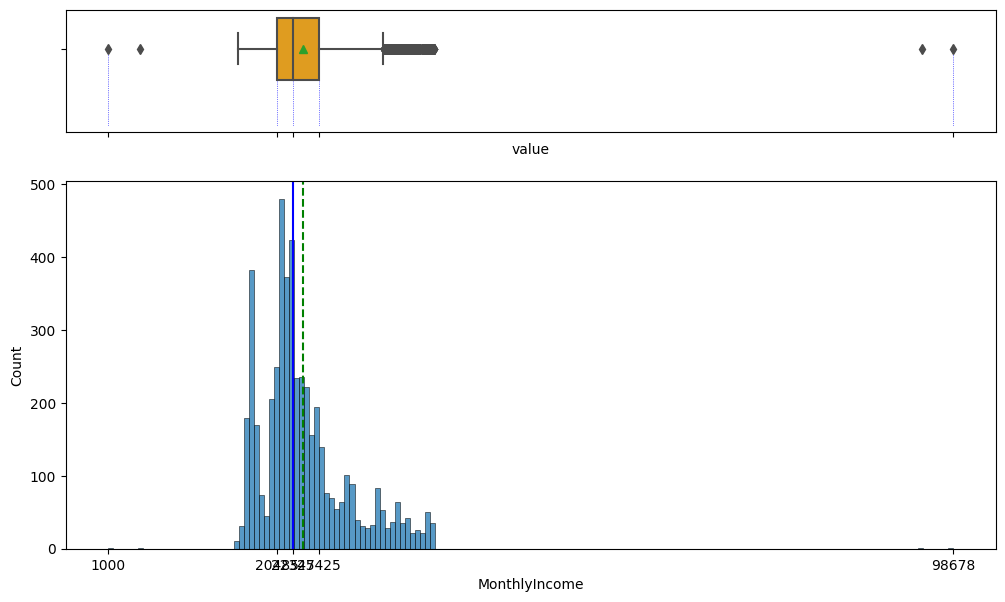

In [ ]:
""" Monthly Income """
# looking at the distribution first
histogram_boxplot(df_num, "MonthlyIncome")

* MonthlyIncome is right-skewd.
* However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars.
* We also see two outliers in the low end and on the highest end.
* There are several outliers after the approx 35K dollars income level.

### **Categorical data**

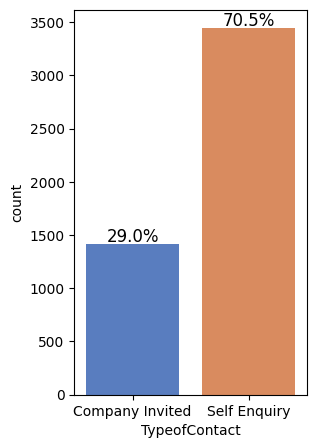

In [ ]:
""" TypeofContact """
labeled_barplot(df_cat,"TypeofContact", True, False)

Self enquiry is the most preffered type of contact

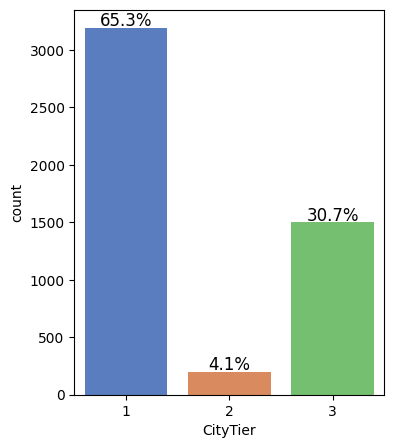

In [ ]:
""" City Tier """
labeled_barplot(df_cat,"CityTier", True, False)

Most of the customers are from Tier 1 cities (65%) and next comes tier3 cities

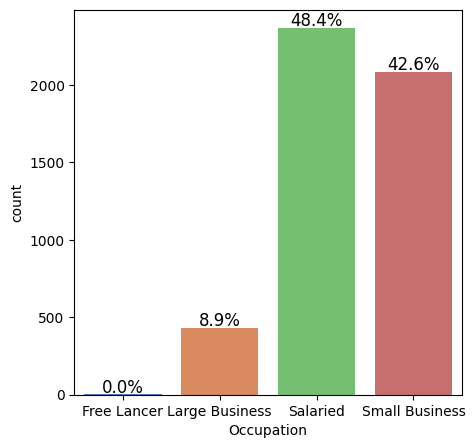

In [ ]:
""" Occupation """
labeled_barplot(df_cat,"Occupation", True, False)

Salaried customers are the highest, then the small businessess. The large business owners are only 9 %

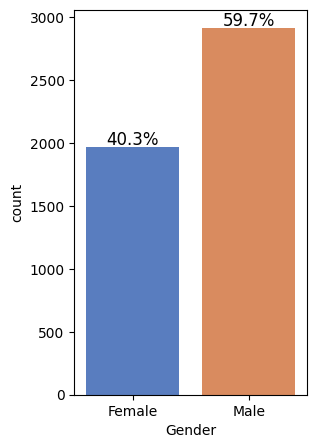

In [ ]:
""" Gender """
labeled_barplot(df_cat,"Gender", True, False)

Male customers are more than the number of female customers

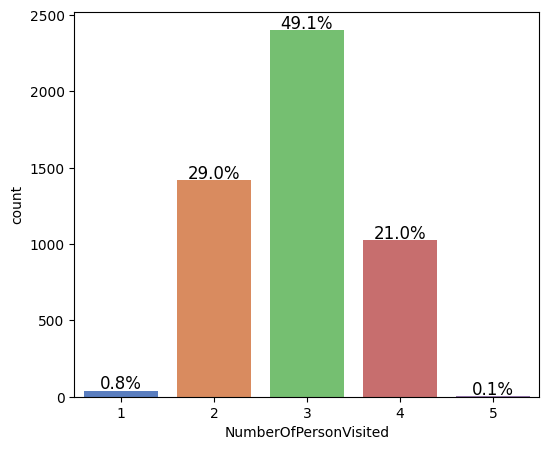

In [ ]:
""" NumberOfPersonVisited """
labeled_barplot(df_cat,"NumberOfPersonVisited", True, False)

Majority of the customers have 3 people with them (probably famalies), there are also customers having 2 and 3 people, .8% travel in couples.
.1% have 5 people with them

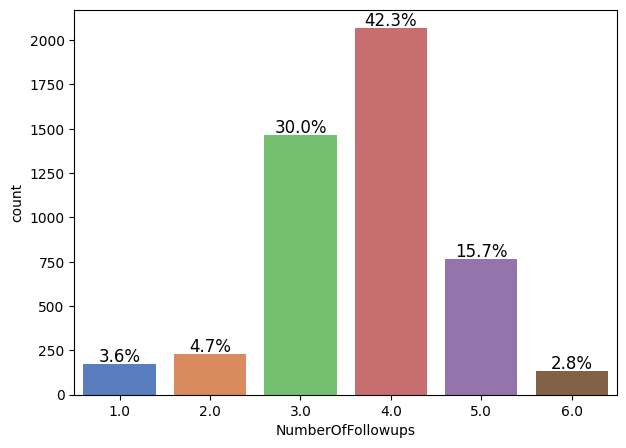

In [ ]:
""" NumberOfFollowups """
labeled_barplot(df_cat,"NumberOfFollowups", True, False)

Almost 40% people require 4 followups and 30% require 3 followups, there are a few with 5 and 6 followups

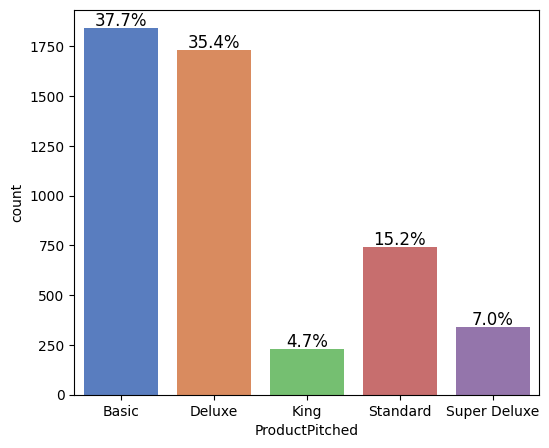

In [ ]:
""" ProductPitched """
labeled_barplot(df_cat,"ProductPitched", True, False)

Most people look for the Basic and Deluxe package

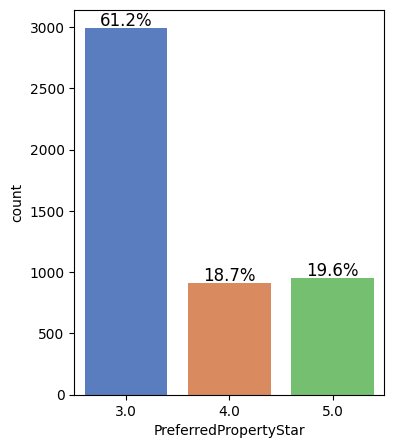

In [ ]:
""" PreferredPropertyStar """
labeled_barplot(df_cat,"PreferredPropertyStar", True, False)

61% prefer 3 star property

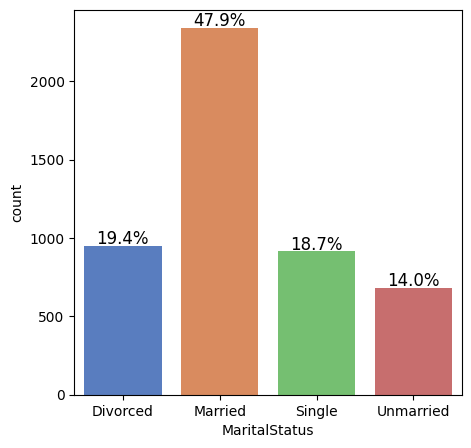

In [ ]:
""" MaritalStatus """
labeled_barplot(df_cat,"MaritalStatus", True, False)

Almost half of the customers are Married

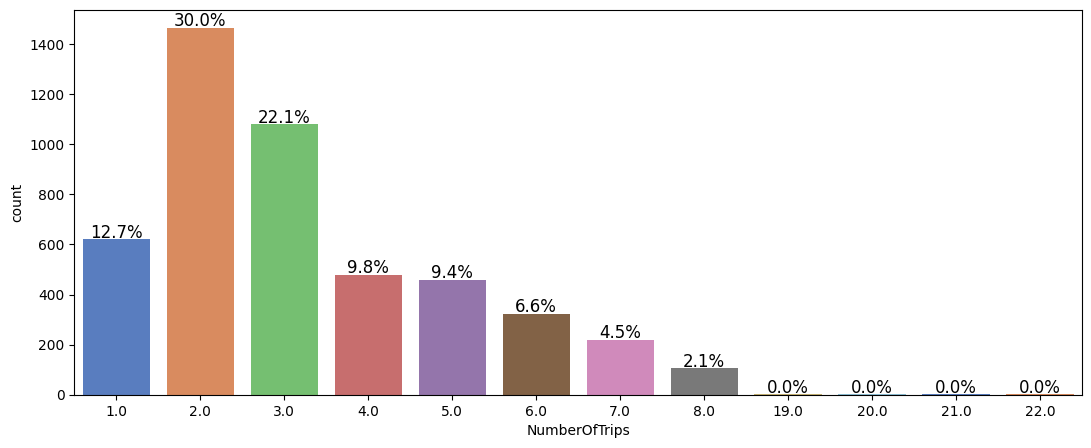

In [ ]:
""" Number of trips """
labeled_barplot(df_cat,"NumberOfTrips", True, False)

Average number of trips in a year by customer 50 % have 2 - 3 trips
* The distribution is slightly right skewed, and  there can be seen some outliers

In [ ]:
# """ Duration of Pitch """
# labeled_barplot(df_cat,"DurationOfPitch", True, False)

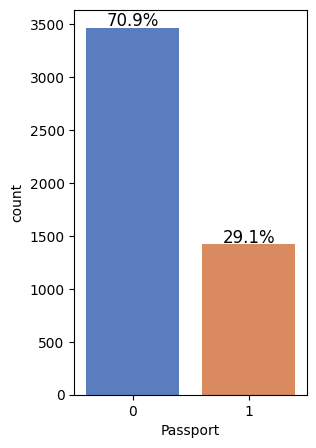

In [ ]:
""" Passports """
labeled_barplot(df_cat,"Passport", True, False)

70% customers already posess a passport

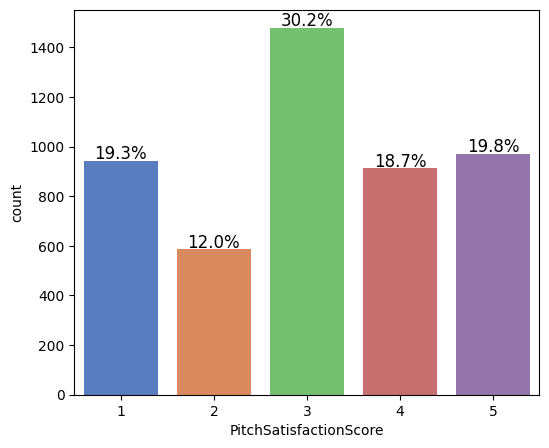

In [ ]:
""" PitchSatisfactionScore """
labeled_barplot(df_cat,"PitchSatisfactionScore", True, False)

* Only 30.2% of customers rated the Sales Pitch with a score of 3.
* Even though 18.7% customers rated at 4.
* 19.8% rated a pitch score of 5.
* we also see that 19.3% rated the Sales pitch score at 1.
* This shows a need for improvement in this area.

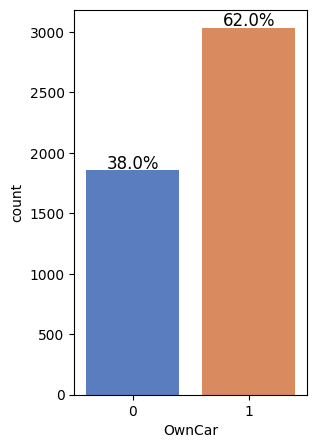

In [ ]:
""" Own Car """
labeled_barplot(df_cat,"OwnCar", True, False)

60% do posess their own car, since this shows enough variation the feature can't be dropped

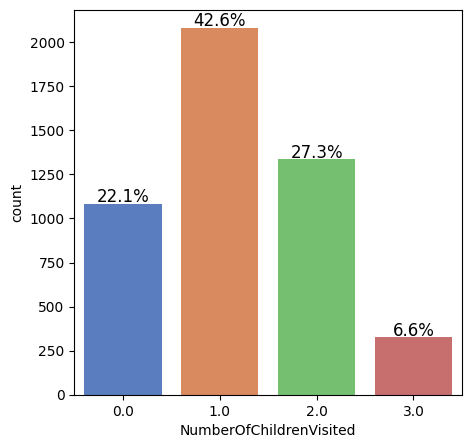

In [ ]:
""" NumberofChildrenVisited """
labeled_barplot(df_cat,"NumberOfChildrenVisited", True, False)

Most people have a single child with them, tho 22% do not have children with them

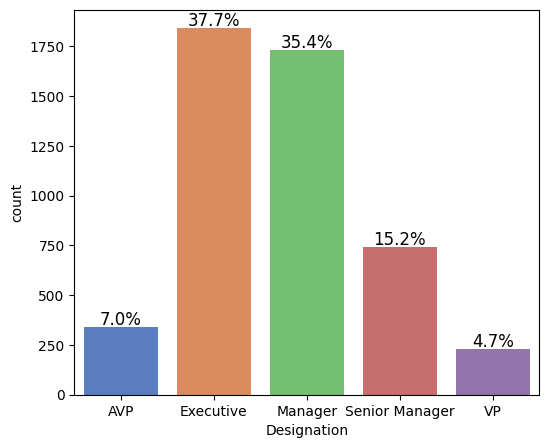

In [ ]:
""" Designation """
labeled_barplot(df_cat,"Designation", True, False)

Most of our customers have Executive and Managers positions.

## **Bivariate Analysis**
Relation between numerical features and target variable

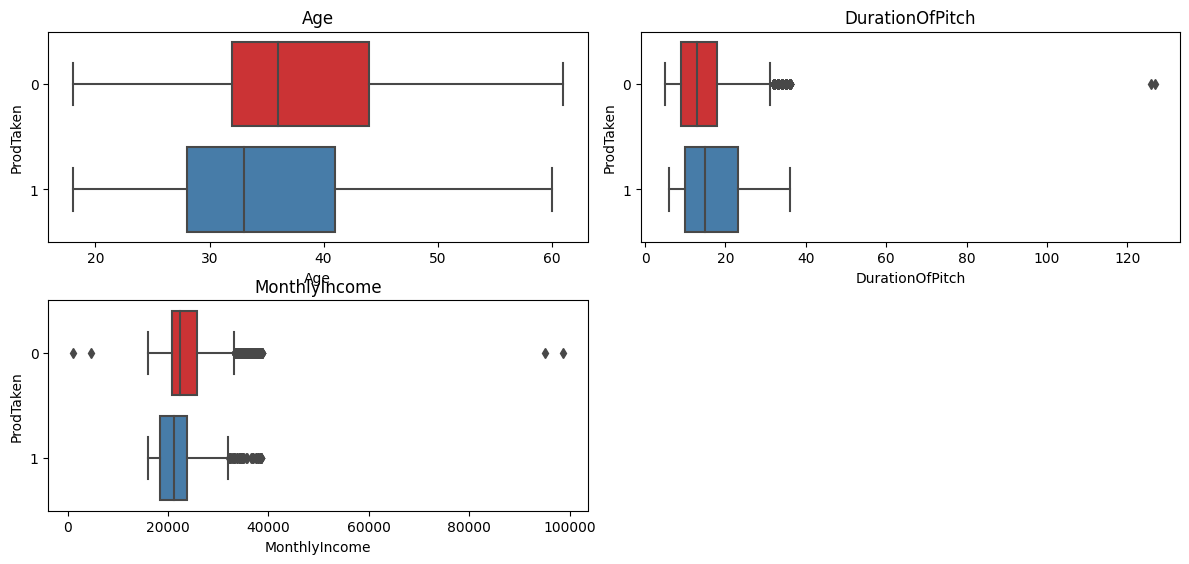

In [ ]:
# Comparision of Numerical Variables with ProdTaken to understand the relation
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12,8))
for i, variable in enumerate(num_cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(y = df["ProdTaken"], x = df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* The mean Age for customers who purchased any Product is slightly less than those who didn"t. We also see that Age variable doesn"t have any outliers.
* The mean DurationofPitch for both classed of ProdTaken is almost equal. We see there are many outliers in Class "0" of ProdTaken, suggesting that longer pitch durations doesn"t lead to product purchase.
* MonthlyIncome - the averages are almost the same. Tho there are several outliers in the higher end for both ProdTaken classes and very few in low end of Class "0".


Relation between categorical features and target variable

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


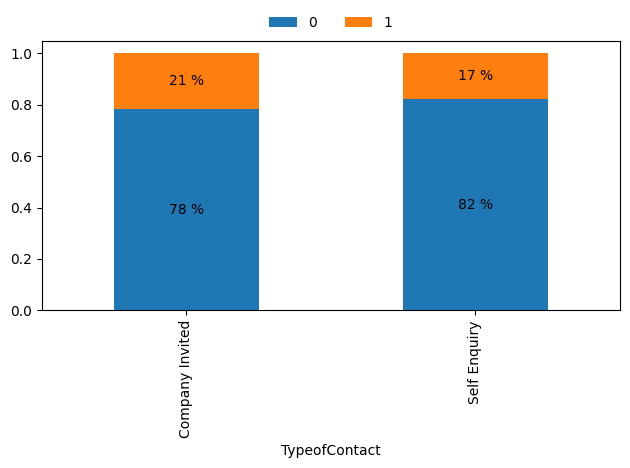

In [ ]:
perc_stacked_barplot(df_cat, "TypeofContact", "ProdTaken")

More Customers with "Company Invited" contact have bought Travel Package when compared to Customers with "Self Enquiry".

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


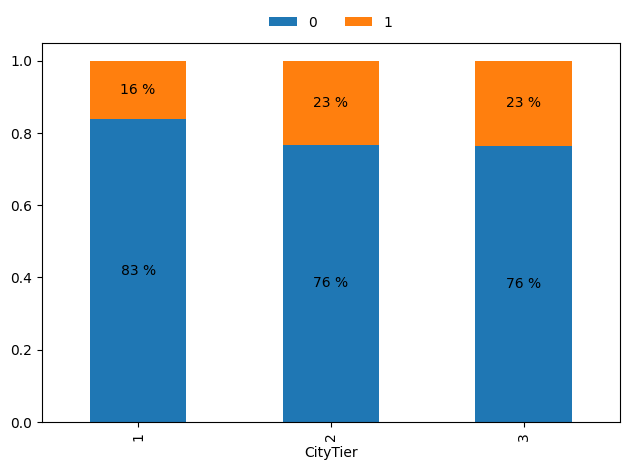

In [ ]:
perc_stacked_barplot(df_cat, "CityTier", "ProdTaken")

More Customers from Tier 2 and 3 cities have purchased Travel Packages.



ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


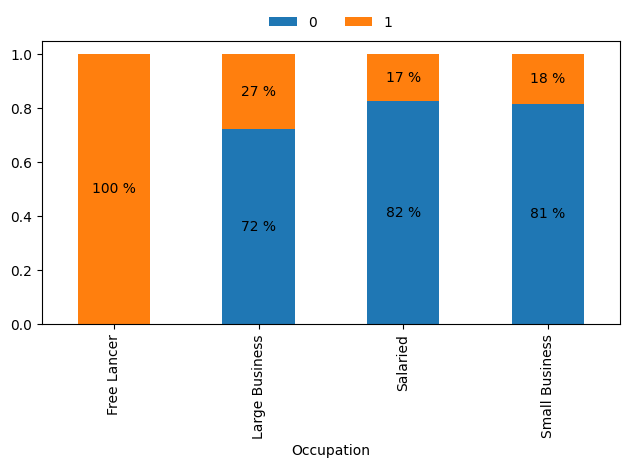

In [ ]:
perc_stacked_barplot(df_cat, "Occupation", "ProdTaken")

* Customers who are Freelancers by Occupation have bought travel packages. However the sample size is only two.
* Of the 434 Large Business owning customers, almost 30% bought travel packages.
* Among Salaried and Small Business owning customers,close to 20% have bought travel packages.

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


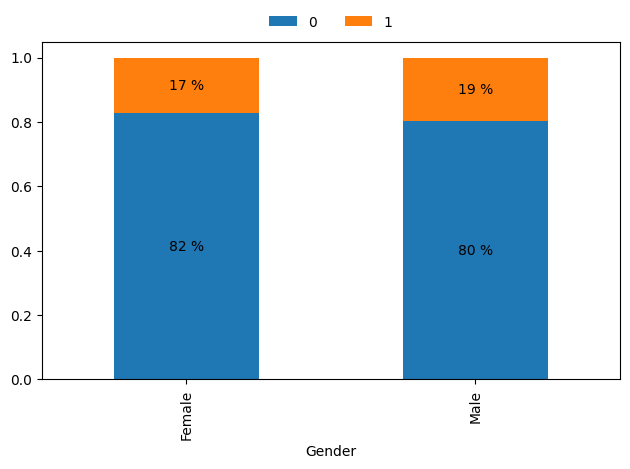

In [ ]:
perc_stacked_barplot(df_cat, "Gender", "ProdTaken")

Number of Male customers are higher than Female customers, however we dont see a lot of difference in the percentage of each Gender select the Product.



ProdTaken                 0    1   All
NumberOfPersonVisited                 
All                    3968  920  4888
3                      1942  460  2402
2                      1151  267  1418
4                       833  193  1026
1                        39    0    39
5                         3    0     3
------------------------------------------------------------------------------------------------------------------------


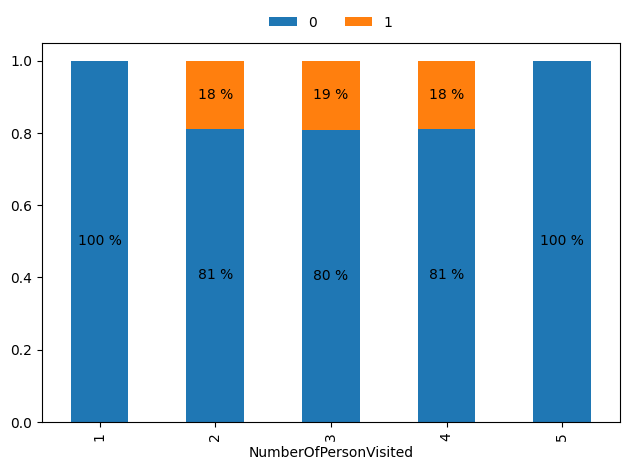

In [ ]:
perc_stacked_barplot(df_cat, "NumberOfPersonVisited", "ProdTaken")

* Customers who plan to take between 2-4 persons with them during travel, close to 20% have bought a travel package product.
* We see that all Customers with one companion and five companions, did not purchase any product.
* This suggests that the products don"t seem either appealing or beneficial to the customers of the above two categories.
* Business should focus on this area.

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


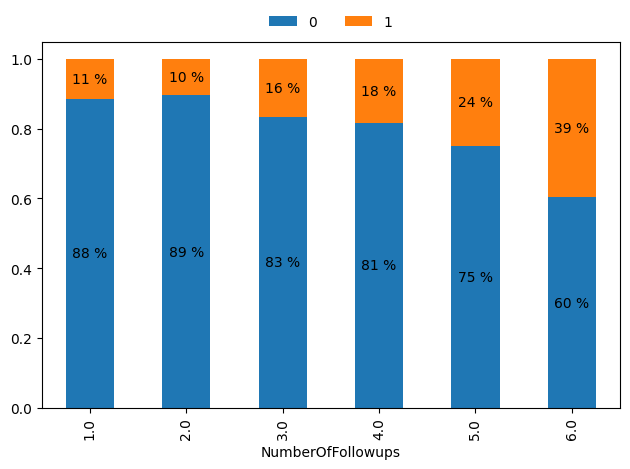

In [ ]:
perc_stacked_barplot(df_cat, "NumberOfFollowups", "ProdTaken")

With the increase in number of followups the percentage of customers buyingthe products is seen to increase.

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


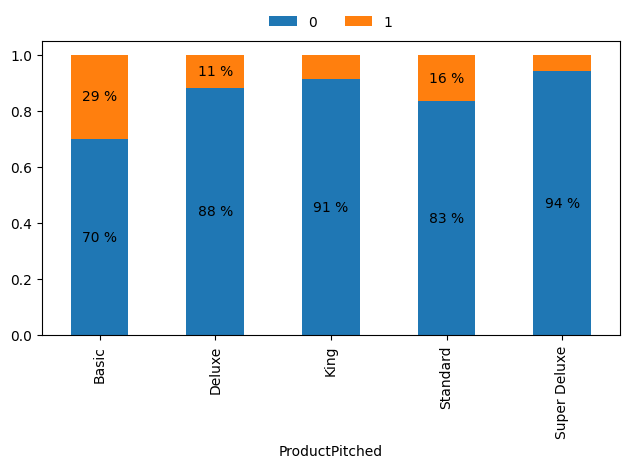

In [ ]:
perc_stacked_barplot(df_cat, "ProductPitched", "ProdTaken")

* The Basic Package is the most preferred
* Standard and Deluxe are following.
* Very few customers purchased Super Deluxe products.

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


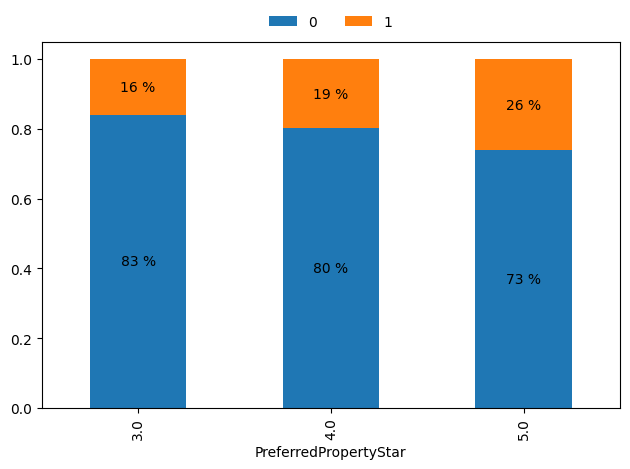

In [ ]:
perc_stacked_barplot(df_cat, "PreferredPropertyStar", "ProdTaken")

* Though majority of customers prefer a 3.0 star rated Property, the percentage of customers purchasing the products is comparatively less than customers who prefer a 4.0 and 5.0 star rated property.
* The higher the property star rating, higher the number of customers who purchased a product.

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


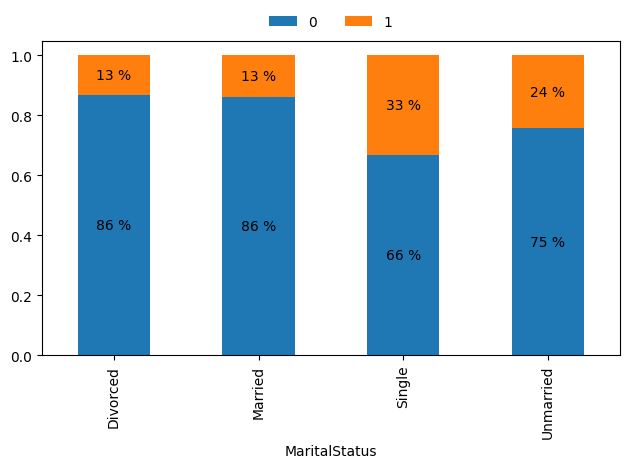

In [ ]:
perc_stacked_barplot(df_cat, "MaritalStatus", "ProdTaken")

* Around 30% of all Single customers have bought a product and about 25% of Unmarried customers have also purchased a product.
* Almost 50% of the total customers belong to the married category, but we see that only approx 15% of them have actually purchased any product.

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


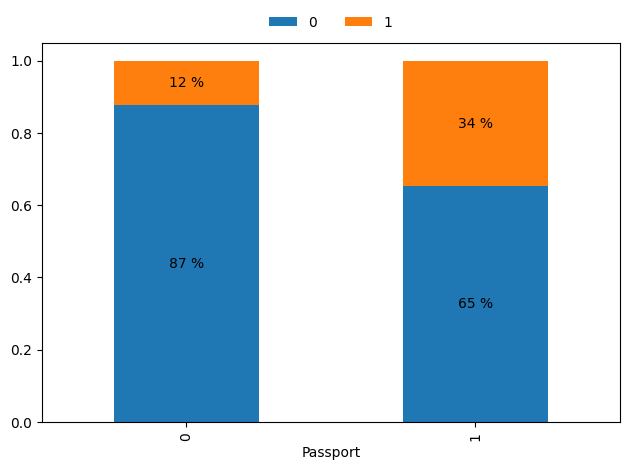

In [ ]:
perc_stacked_barplot(df_cat, "Passport", "ProdTaken")

Customers with passport tend to purchase products than those who don"t.



ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


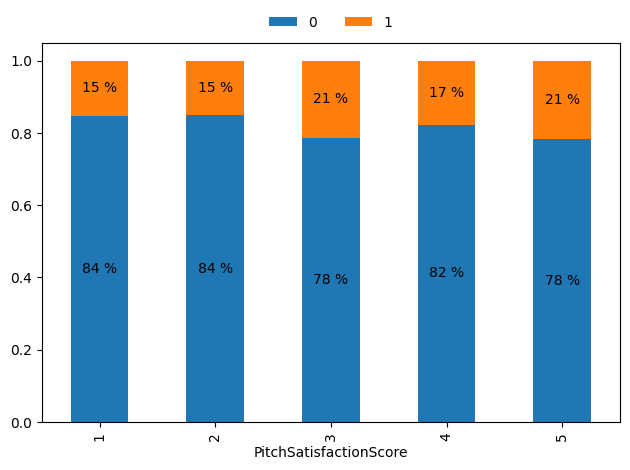

In [ ]:
perc_stacked_barplot(df_cat, "PitchSatisfactionScore", "ProdTaken")

* Maximum customers have given the score 3 and 5.
* Majority of customers have given a score of 3.0 to the Sale pitch for the products.
* But we observe that the number of customers who purchased any product is almost equal across all pitch scores.

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


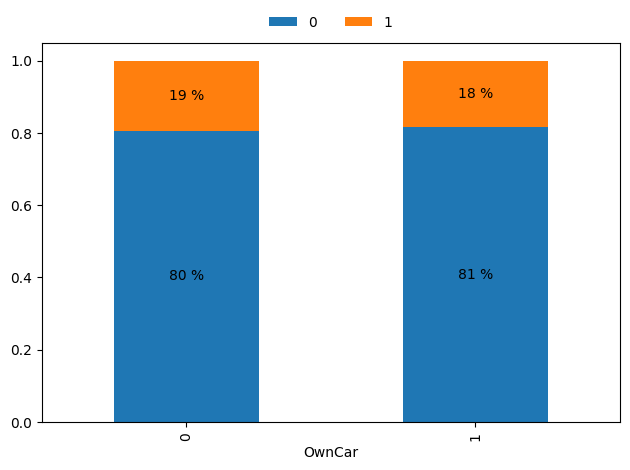

In [ ]:
perc_stacked_barplot(df_cat, "OwnCar", "ProdTaken")

Customers with own car and no car, their package purchase percentage is almost the same.

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
All                      3909  913  4822
1.0                      1688  392  2080
2.0                      1082  253  1335
0.0                       880  202  1082
3.0                       259   66   325
------------------------------------------------------------------------------------------------------------------------


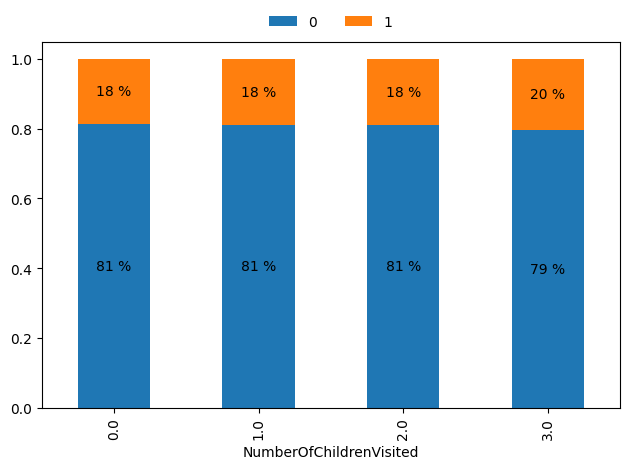

In [ ]:
perc_stacked_barplot(df_cat, "NumberOfChildrenVisited", "ProdTaken")

The number of children visiting does not affect the purchase percentage and it does not vary much

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


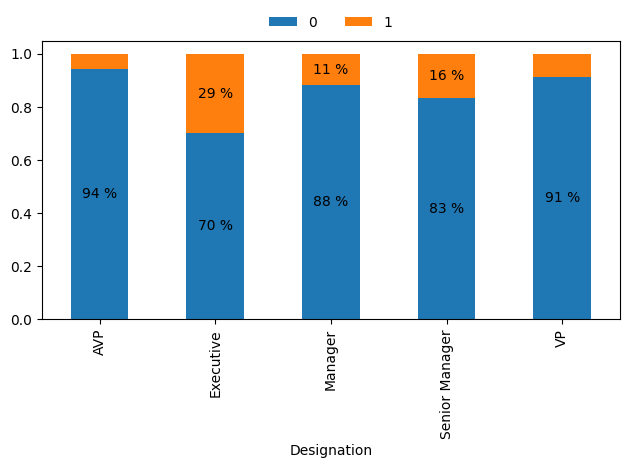

In [ ]:
perc_stacked_barplot(df_cat, "Designation", "ProdTaken")

* Customers who are executives tend to purchase the package more.
* AVP's are least likely to purchase the package

<ipython-input-188-1959a576e907>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap = colormap)


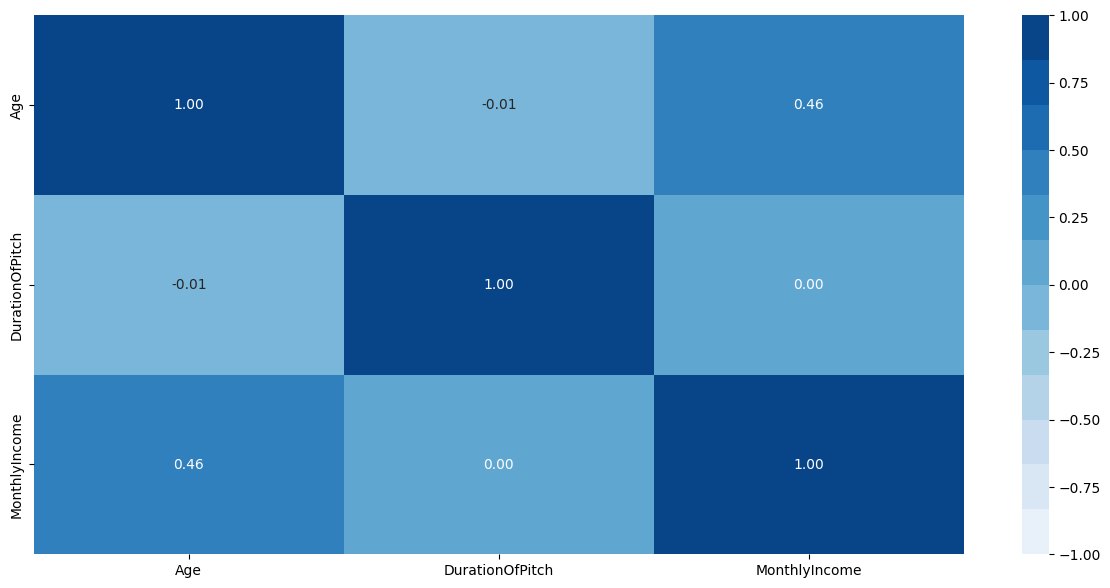

In [ ]:
# heatmap for correlation
plt.figure(figsize=(15, 7))
colormap = sns.color_palette("Blues",12)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap = colormap)
plt.show()

* Only Age is correlated to Monthly Income significantly,  0.47;
 i.e as Age increases, so does MontlyIncome
* Age and Duration of pitch have a slightly negative correlation

## **Treating outliers**

Only Duration of Pitch, Number of trips and Monthly Income have outliers. Since we shall experiment the data with logistic regression as well, we need to be cap the outliers.

In [ ]:
def outlier_cap(x):
  x = x.clip(lower = x.quantile(0.05))   # method assigns values outside boundary to boundary values
  x = x.clip(upper = x.quantile(0.95))   # The quantile() method calculates the quantile of the values in a given axis. Default axis is row.
  return(x)

In [ ]:
for col in df_num.columns:
  df_num[col] = outlier_cap(df_num[col])

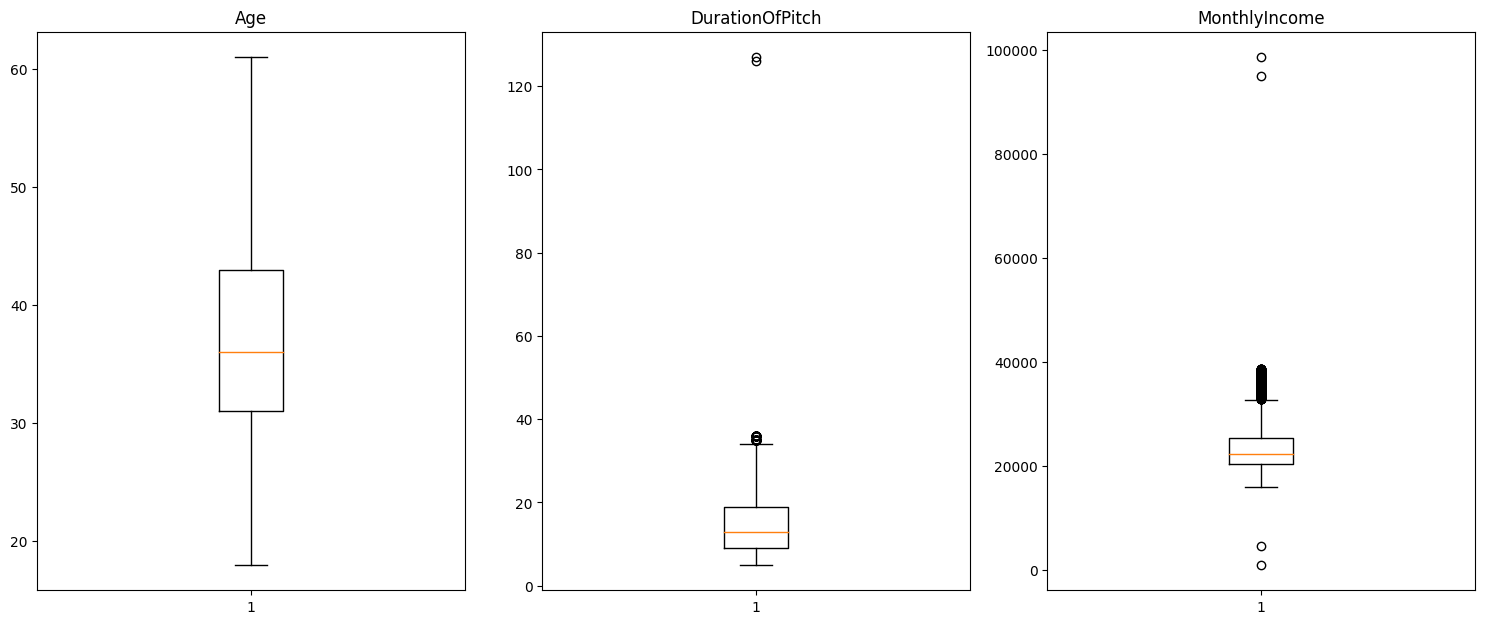

In [ ]:
# checking the distribution now
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## **Creating Dummies**

In [ ]:
Y = df_cat["ProdTaken"]
df_cat = df_cat.drop("ProdTaken", axis = 1)

In [ ]:
#creating features with n-1 variables
df_dummies = pd.get_dummies(df_cat, drop_first = True)
df_dummies.head()

,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,NumberOfPersonVisited_2,NumberOfPersonVisited_3,NumberOfPersonVisited_4,...,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_1,NumberOfChildrenVisited_1.0,NumberOfChildrenVisited_2.0,NumberOfChildrenVisited_3.0,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,1,1,0,0,1,0,0,0
4,1,0,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0


## **Selecting KBest**

In [ ]:
#selecting the Kbest for categorical cols
# chi sq test used to compare and score the categorical features

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(df_dummies, Y)

# Get columns to keep and create a new dataframe with selected features
cols = selector.get_support(indices = True)
selected_features_df_char = df_dummies.iloc[:,cols]

In [ ]:
X = pd.concat([selected_features_df_char, df_num], axis = 1, join = 'inner')
X.head().T

,0,1,2,3,4
CityTier_3,1.0,0.0,0.0,0.0,0.0
Occupation_Large Business,0.0,0.0,0.0,0.0,0.0
NumberOfFollowups_2.0,0.0,0.0,0.0,0.0,0.0
NumberOfFollowups_5.0,0.0,0.0,0.0,0.0,0.0
NumberOfFollowups_6.0,0.0,0.0,0.0,0.0,0.0
ProductPitched_Deluxe,1.0,1.0,0.0,0.0,0.0
ProductPitched_King,0.0,0.0,0.0,0.0,0.0
ProductPitched_Super Deluxe,0.0,0.0,0.0,0.0,0.0
PreferredPropertyStar_5.0,0.0,0.0,0.0,0.0,0.0
MaritalStatus_Married,0.0,0.0,0.0,0.0,0.0


## **Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data into training and test set, use stratify to maintain the original distribution of Dependent variable as of original set
X_train,X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state=25,stratify=Y)

# creating a list of column names
feature_names = X_train.columns.to_list()

In [ ]:
print("Original ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 1]), (len(df.loc[df["ProdTaken"] == 1])/len(df.index)) * 100))
print("Original ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df["ProdTaken"] == 0]), (len(df.loc[df["ProdTaken"] == 0])/len(df.index)) * 100))
print()
print("Training ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print()
print("Test ProdTaken True Values        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test ProdTaken False Values       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))

Original ProdTaken True Values    : 920 (18.82%)
Original ProdTaken False Values   : 3968 (81.18%)

Training ProdTaken True Values    : 644 (18.82%)
Training ProdTaken False Values   : 2777 (81.18%)

Test ProdTaken True Values        : 276 (18.81%)
Test ProdTaken False Values       : 1191 (81.19%)


## **Model Building**

### **Function**

In [ ]:
from sklearn import metrics

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[]

    # predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # accuracy of the model
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)

    # recall of the model
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    # precision of the model
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)

    # f1_score of the model
    train_f1 = metrics.f1_score(Y_train,pred_train)
    test_f1 = metrics.f1_score(Y_test,pred_test)

    # populate the score_list
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)

    return score_list # returning the list with train n test scores

### **Algorithms**

In [ ]:
# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

### **Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
lr_score = get_metrics_score(lr)

Accuracy on training set :  0.8316281788950599
Accuracy on test set :  0.8445807770961146
Recall on training set :  0.22826086956521738
Recall on test set :  0.2644927536231884
Precision on training set :  0.6504424778761062
Precision on test set :  0.7448979591836735
F1 on training set :  0.3379310344827586
F1 on test set :  0.39037433155080214


### **Decision Tree Classifier**

In [ ]:
# DecistionTreeClassifier with gini and class_weight for appropriate importance
dtc = DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training dataset
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
# grid search CV for hyperparameter tuning of our Decision Tree
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtc, cv = 10, param_grid= param_dist,n_jobs = 3)
tree_grid.fit(X_train,Y_train)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [ ]:
# check the scores on Training and Testing Datasets
dtc_score = get_metrics_score(dtc)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.89093387866394
Recall on training set :  1.0
Recall on test set :  0.6594202898550725
Precision on training set :  0.9984496124031008
Precision on test set :  0.7338709677419355
F1 on training set :  0.9992242048099302
F1 on test set :  0.6946564885496184


### **XG_Boost Classifier**

In [ ]:
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 10,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':100
        }

xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, Y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
y_pred = xgb_clf.predict(X_test)

score = get_metrics_score(xgb_clf)

Accuracy on training set :  0.8889213680210465
Accuracy on test set :  0.8704839809134287
Recall on training set :  0.5124223602484472
Recall on test set :  0.44565217391304346
Precision on training set :  0.8333333333333334
Precision on test set :  0.76875
F1 on training set :  0.6346153846153847
F1 on test set :  0.5642201834862386


*  Decision Tree has an accuracy of 89% but train accuracy is 99%,which it is silghtly overfitting as it classifies each and every datapoint correctly.
*  XG Boost has an accuracy of  87%(close to train accuracy) is the best performing model,as it uses regularization method to prevent overfitting and pruning technique for best split.



In [ ]:
#Predicted probalities
P_value = xgb_clf.predict_proba(X_test)

P_value_class_0 = P_value[:,0]
P_value_class_1= P_value[:,1]

print("Probilities of not purchasing a package",P_value_class_0)
print("Probabilities of purchasing a package",P_value_class_1)

Probilities of not purchasing a package [0.772357   0.8340069  0.48102707 ... 0.75860727 0.9508797  0.97537947]
Probabilities of purchasing a package [0.227643   0.16599306 0.51897293 ... 0.24139273 0.04912029 0.02462055]


### **Model Evaluation Metrics**

#####**Functions**

In [ ]:
# Function for confusion matrix
def plot_confusion_matrix(model, X_test, Y_test):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)

    sns.set(style='white')
    cm = np.array(cm)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 30},
                cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
                yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=20, length=0)

    ax.set_title('Confusion Matrix with labels', size=24, pad=20)
    ax.set_xlabel('Predicted Values', size=20)
    ax.set_ylabel('Actual Values', size=20)

    additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
                ha='center', va='top', size=24)
    plt.tight_layout()
    plt.show()







In [ ]:
# Function for ROC_AUC curve
from sklearn.metrics import roc_curve, auc, confusion_matrix

def plot_roc_curve_with_metrics(model, X_test, Y_test, threshold=0.5):
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    y_pred = np.where(y_pred_prob > threshold, 1, 0)
    cm = confusion_matrix(Y_test, y_pred)

    sensitivity = tpr
    specificity = 1 - fpr

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

### **Confusion matrix for Logistic Regression**

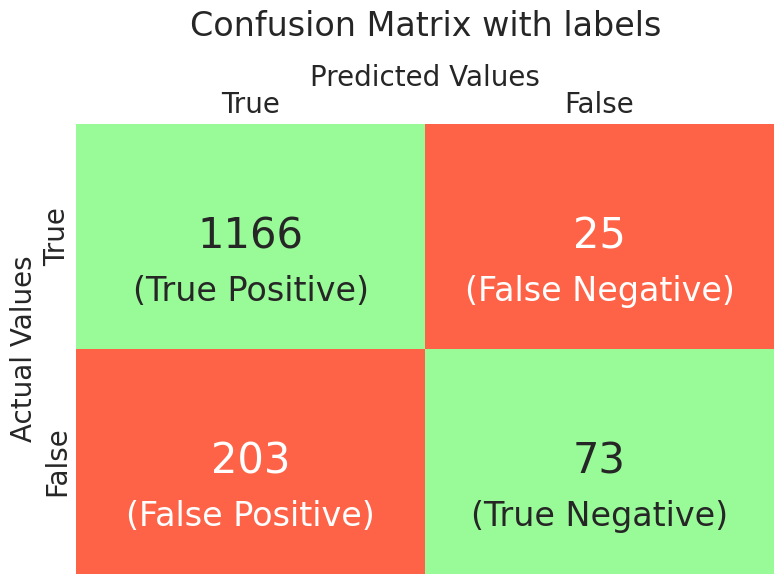

In [ ]:
plot_confusion_matrix(lr, X_test, Y_test)

**Metrics Score**

In [ ]:
get_metrics_score(lr)

Accuracy on training set :  0.8316281788950599
Accuracy on test set :  0.8445807770961146
Recall on training set :  0.22826086956521738
Recall on test set :  0.2644927536231884
Precision on training set :  0.6504424778761062
Precision on test set :  0.7448979591836735
F1 on training set :  0.3379310344827586
F1 on test set :  0.39037433155080214


[0.8316281788950599,
 0.8445807770961146,
 0.22826086956521738,
 0.2644927536231884,
 0.6504424778761062,
 0.7448979591836735,
 0.3379310344827586,
 0.39037433155080214]

### **ROC_AUC curve for Logistic Regression**

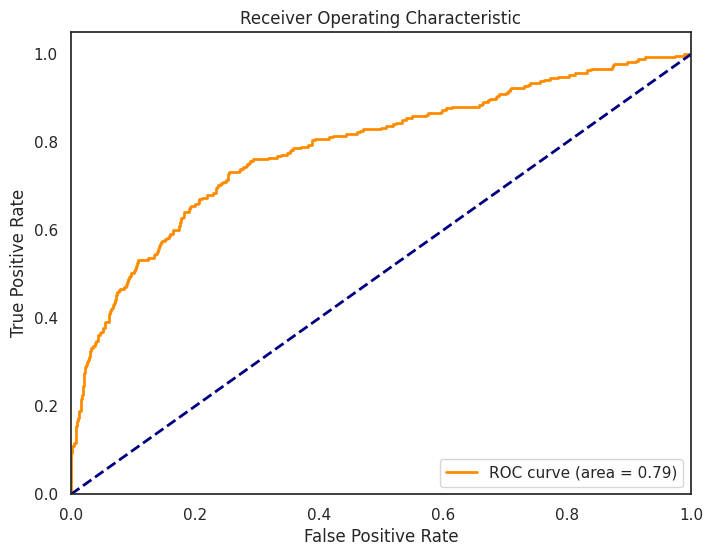

In [ ]:
plot_roc_curve_with_metrics(lr, X_test, Y_test, threshold=0.5)

### **Confusion matrix for Decision Tree Classifier**

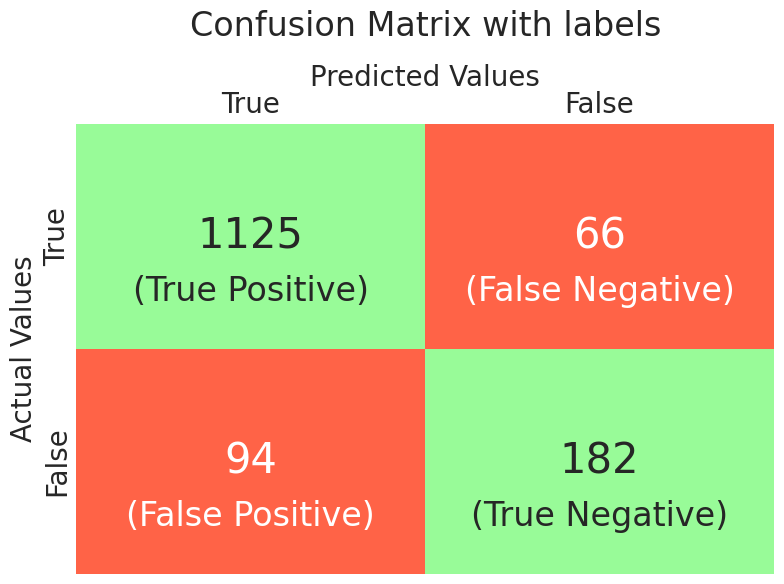

In [ ]:
plot_confusion_matrix(dtc, X_test, Y_test)

**Metrics Score**

In [ ]:
get_metrics_score(dtc)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.89093387866394
Recall on training set :  1.0
Recall on test set :  0.6594202898550725
Precision on training set :  0.9984496124031008
Precision on test set :  0.7338709677419355
F1 on training set :  0.9992242048099302
F1 on test set :  0.6946564885496184


[0.9997076878105817,
 0.89093387866394,
 1.0,
 0.6594202898550725,
 0.9984496124031008,
 0.7338709677419355,
 0.9992242048099302,
 0.6946564885496184]

### **ROC_AUC curve for Decision Tree Classifier**

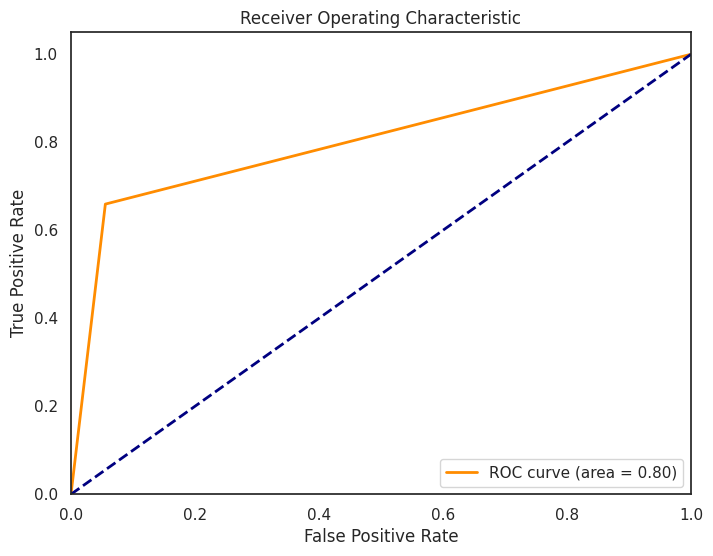

In [ ]:
plot_roc_curve_with_metrics(dtc, X_test, Y_test, threshold=0.5)

### **Confusion matrix for XG Boost Classifier**

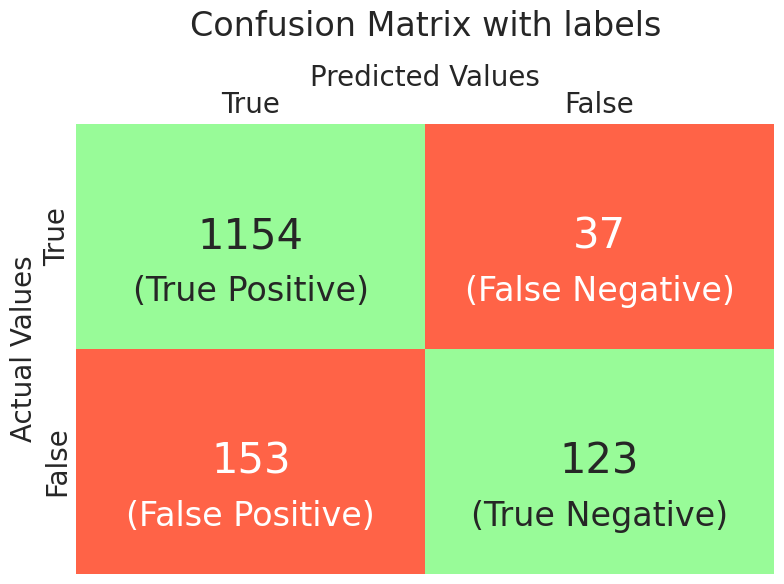

In [ ]:
plot_confusion_matrix(xgb_clf, X_test, Y_test)

### **ROC_AUC curve for XG Boost classifier**

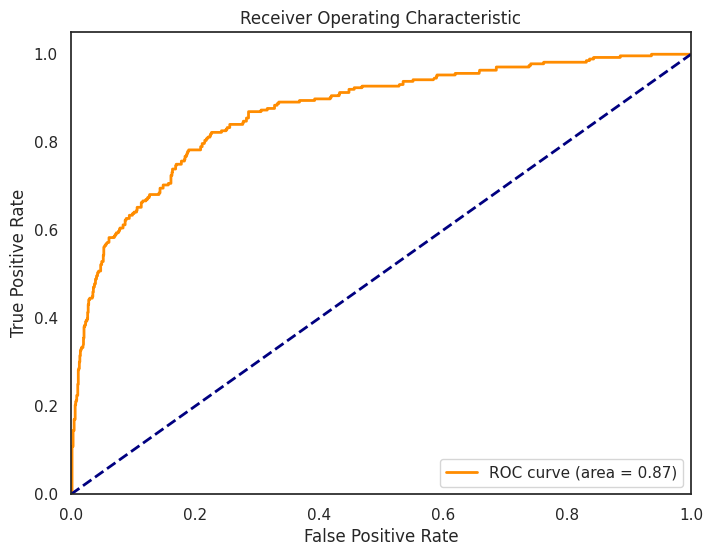

In [ ]:
plot_roc_curve_with_metrics(xgb_clf, X_test, Y_test, threshold=0.5)

**Metrics Score**

In [ ]:
get_metrics_score(xgb_clf)

Accuracy on training set :  0.8889213680210465
Accuracy on test set :  0.8704839809134287
Recall on training set :  0.5124223602484472
Recall on test set :  0.44565217391304346
Precision on training set :  0.8333333333333334
Precision on test set :  0.76875
F1 on training set :  0.6346153846153847
F1 on test set :  0.5642201834862386


[0.8889213680210465,
 0.8704839809134287,
 0.5124223602484472,
 0.44565217391304346,
 0.8333333333333334,
 0.76875,
 0.6346153846153847,
 0.5642201834862386]

- Decision Tree has highest recall(66%) which is percentage of total relevant results correctly classified.
- XG Boost has the highest AUC score compared to logistic regression and decision tree classifier.
- AUC(area under the curve) score of 87% is a  measure of probability of classifying instances of positive class higher than that of negative class.
- Which means 87% of times the model is correctly predicting the customers who will purchase the package.
